# Used Car Price Prediction

In the course of this project, I analyzed a dataset comprising used cars sourced from eBay Kleinanzeigen, the classifieds section of the German eBay platform.The dataset was uploaded to data.world by the user orgeleka. For reference and further exploration, the dataset is accessible [here](https://data.world/data-society/used-cars-data)

<figure style="text-align: center;">
  <img src="cars.jpg" style="width:400px;height:300px; margin: auto;">
</figure>

Below are essential details from the dataset:
- `dateCrawled` - Timestamp indicating the initial web crawl of the advertisement. All field values are extracted from this particular date.
- `name` - Title of the vehicle.
- `seller` - Specifies whether the seller is an individual or a dealership.
- `offerType` - The categorization of the listing.
- `Price` - The advertised selling price of the vehicle.
- `abtest` - Indicates whether the listing is part of an A/B test.
- `vehicleType` - The category or type of the vehicle.
- `yearOfRegistration` - The year when the vehicle was originally registered.
- `gearbox` - The kind of transmission used by the vehicle.
- `powerPS` - The power of the vehicle measured in PS (horsepower).
- `model` - The specific model name of the car.
- `kilometer` - The total distance, in kilometers, the car has traveled.
- `monthOfRegistration` - The month in which the vehicle was initially registered.
- `fuelType` - The type of fuel system employed by the car.
- `brand` - The manufacturing brand of the vehicle.
- `notRepairedDamage` - Indicates whether the car has unrepaired damages.
- `dateCreated` - The date on which the eBay listing was initially created.
- `nrOfPictures` - The number of images included in the advertisement.
- `postalCode` - The postal code corresponding to the vehicle's location.
- `lastSeen` - Timestamp indicating the most recent online appearance of the advertisement by the web crawler.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib
from tqdm.notebook import tqdm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score, KFold
import xgboost as xgb
import os
from tqdm import tqdm
pd.set_option("display.max_columns",None)
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [2]:
df = pd.read_csv("car_data.csv", encoding = 'UTF-8')

In [3]:
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,Lattitude,Longitude,lastSeen
0,19-03-2016 16:52,Volkswagen_Golf_1.4_Special,privat,Angebot,2600,test,limousine,2003,manuell,75,golf,150000,4,benzin,volkswagen,nein,19-03-2016 00:00,0,52224,50.76670,6.23333,19-03-2016 16:52
1,18-03-2016 14:38,Volkswagen_Golf_1.4_Special_TÜV_Klimaautomatik_VW,privat,Angebot,2300,test,limousine,2003,manuell,75,golf,150000,4,benzin,volkswagen,nein,18-03-2016 00:00,0,48369,52.17520,7.63132,21-03-2016 07:16
2,21-03-2016 18:58,Volkswagen_Golf_1.4_Ocean,privat,Angebot,2750,test,limousine,2003,manuell,75,golf,150000,9,benzin,volkswagen,nein,21-03-2016 00:00,0,58730,51.47450,7.76699,06-04-2016 21:16
3,23-03-2016 23:52,"Volkswagen_Golf_1.4_Ocean_Klima""2.Hand""VW_Sche...",privat,Angebot,2850,control,limousine,2003,manuell,75,golf,150000,10,benzin,volkswagen,nein,23-03-2016 00:00,0,47137,51.43511,6.76301,06-04-2016 19:15
4,05-04-2016 10:49,Volkswagen_Golf_1.4_Ocean,privat,Angebot,2700,control,limousine,2003,manuell,75,golf,150000,8,benzin,volkswagen,nein,05-04-2016 00:00,0,15754,52.28128,13.79809,07-04-2016 14:56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371399,21-03-2016 18:46,Ford_Fiesta_1.25,privat,Angebot,4499,test,kleinwagen,2009,manuell,60,fiesta,50000,11,benzin,ford,nein,21-03-2016 00:00,0,10553,52.52468,13.40535,06-04-2016 20:19
371400,17-03-2016 18:53,Ford_Fiesta_Tuev_bis_2017,privat,Angebot,600,control,kleinwagen,2001,manuell,60,fiesta,125000,0,benzin,ford,nein,17-03-2016 00:00,0,26532,53.59320,7.36323,20-03-2016 21:18
371401,21-03-2016 13:57,Ford_Fiesta_1.3_Ambiente__Klima__Tuev_2017__Al...,privat,Angebot,3499,test,kleinwagen,2006,manuell,60,fiesta,100000,10,benzin,ford,nein,21-03-2016 00:00,0,52428,50.93330,6.36667,28-03-2016 09:46
371402,01-04-2016 12:53,Ford_Fiesta_1.25,privat,Angebot,6100,test,kleinwagen,2009,manuell,60,fiesta,40000,4,benzin,ford,nein,01-04-2016 00:00,0,78224,47.76670,8.83333,01-04-2016 12:53


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371404 entries, 0 to 371403
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dateCrawled          371404 non-null  object 
 1   name                 371389 non-null  object 
 2   seller               371404 non-null  object 
 3   offerType            371404 non-null  object 
 4   price                371404 non-null  int64  
 5   abtest               371404 non-null  object 
 6   vehicleType          333550 non-null  object 
 7   yearOfRegistration   371404 non-null  int64  
 8   gearbox              351202 non-null  object 
 9   powerPS              371404 non-null  int64  
 10  model                350929 non-null  object 
 11  kilometer            371404 non-null  int64  
 12  monthOfRegistration  371404 non-null  int64  
 13  fuelType             338027 non-null  object 
 14  brand                371404 non-null  object 
 15  notRepairedDamage

Converting columns containing date values from the object datatype to the datetime datatype.

In [5]:
df['dateCrawled'] = pd.to_datetime(df['lastSeen'], format='%d-%m-%Y %H:%M')

In [6]:
df['lastSeen'] = pd.to_datetime(df['lastSeen'], format='%d-%m-%Y %H:%M')

In [7]:
#finding duplicated rows
df.duplicated().sum() #duplicated rows are present

286

In [8]:
df = df.drop_duplicates() #dropping duplicated rows

In [9]:
#columns that have all zero values.
df.columns[df.isnull().all(axis=0)] 

Index([], dtype='object')

In [10]:
#rows that have all null values.
df[df.isnull().all(axis=1)] 

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,Lattitude,Longitude,lastSeen


In [11]:
#rows that have all zero values
df[df.eq(0).all(axis=1)] 

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,Lattitude,Longitude,lastSeen


## changing values from german to english

In [12]:
df["seller"].unique()

array(['privat', 'gewerblich'], dtype=object)

- 'privat' - private
- 'gewerblich'- commercial

In [13]:
df["offerType"].unique()

array(['Angebot', 'Gesuch'], dtype=object)

- 'Angebot' - offered
- 'Gesuch' - wanted

In [14]:
df["vehicleType"].unique()

array(['limousine', 'kleinwagen', 'cabrio', nan, 'kombi', 'coupe',
       'andere', 'bus', 'suv'], dtype=object)

- 'kleinwagen' - compact car
- 'cabrio' - convertible
- 'kombi' - station wagon
- 'andere' - other

In [15]:
df["gearbox"].unique()

array(['manuell', 'automatik', nan], dtype=object)

- "manuell" - Manual
- "automatik" - automatic

In [16]:
df["fuelType"].unique()

array(['benzin', 'diesel', nan, 'lpg', 'hybrid', 'andere', 'elektro',
       'cng'], dtype=object)

- 'benzin' - petrol
- 'andere' - other
- 'elektro' - electric

In [17]:
df["notRepairedDamage"].unique()

array(['nein', nan, 'ja'], dtype=object)

- "nein" - No
- "ja" - yes

In [18]:
def German_to_English(df):
    df["seller"] = df["seller"].replace({"privat":"private","gewerblich":"commercial"})
    df["offerType"] = df["offerType"].replace({"Angebot":"offered","Gesuch":"wanted"})
    df["vehicleType"] = df["vehicleType"].replace({"kleinwagen":"compact car","cabrio":"convertible","kombi":"station wagon","andere":"other"})
    df["gearbox"] = df["gearbox"].replace({"manuell":"Manual","automatik":"automatic"})
    df["fuelType"] = df["fuelType"].replace({"benzin":"petrol","andere":"other","elektro":"electric"})
    df["notRepairedDamage"] = df["notRepairedDamage"].replace({"nein":"No","ja":"yes"})

    return df

In [19]:
df = German_to_English(df)

In [20]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'Lattitude', 'Longitude', 'lastSeen'],
      dtype='object')

Let's select only the columns important for the model.

In [21]:
df = df.drop(['offerType','dateCrawled', 'name',"abtest","monthOfRegistration","dateCreated","nrOfPictures",\
              "postalCode","Lattitude",'Longitude', 'lastSeen'],axis=1)

In [22]:
df.isnull().sum()

seller                    0
price                     0
vehicleType           37833
yearOfRegistration        0
gearbox               20196
powerPS                   0
model                 20466
kilometer                 0
fuelType              33361
brand                     0
notRepairedDamage     71981
dtype: int64

# Data Cleaning

There are numerous null values. Instead of dropping the rows, let's impute them by filling in the missing values with the mode values corresponding to their respective car models.

In [23]:
def custom_mode(series):
    mode_values = series.mode()
    return mode_values.iloc[0] if not mode_values.empty else None

def impute_categorical_columns(df, columns, default_value=None):
    for column in columns:
        mode_val = df.groupby("model")[column].transform(custom_mode)
        df[column] = df[column].fillna(mode_val)

    df.dropna(subset=columns, inplace=True)

    return df

columns_to_impute = ['vehicleType', 'gearbox', 'model', 'fuelType', 'notRepairedDamage']
df = impute_categorical_columns(df, columns_to_impute, default_value='Unknown')

In [24]:
df.isnull().sum()

seller                0
price                 0
vehicleType           0
yearOfRegistration    0
gearbox               0
powerPS               0
model                 0
kilometer             0
fuelType              0
brand                 0
notRepairedDamage     0
dtype: int64

In [25]:
df["seller"].value_counts()

seller
private       350647
commercial         3
Name: count, dtype: int64

As there is only one commercial seller value in this column, it is not useful for our analysis. Therefore, let's proceed to drop it.

In [26]:
df = df.drop("seller",axis=1)

In [27]:
df["yearOfRegistration"].unique()

array([2003, 2001, 1999, 1995, 1998, 2004, 2006, 1994, 2000, 2005, 1997,
       1996, 1988, 1993, 2002, 1989, 1992, 1991, 2007, 1984, 1987, 2009,
       1985, 1990, 1986, 1983, 1970, 2016, 2008, 1975, 1982, 1960, 1981,
       1974, 2012, 2010, 1910, 1980, 1979, 2011, 1978, 2015, 1977, 1969,
       2013, 1966, 1967, 1976, 1963, 1971, 1956, 1962, 1945, 1972, 1973,
       1958, 1965, 1964, 1968, 1953, 1951, 1943, 1928, 1929, 1930, 1959,
       1919, 2014, 1950, 1932, 1600, 1961, 1957, 1955, 1954, 1200, 1931,
       8984, 1927, 1941, 1942, 1934, 1947, 3984, 5895, 4984, 1000, 2984,
       8184, 1800, 1500, 1936, 1935, 1933, 1937, 7084, 9983, 6984, 7484,
       2184, 1952, 7984, 5539, 5884, 8484, 4484, 1602, 1001, 2274, 2484,
       1300, 1234, 3684, 1111, 2050, 6484, 6184, 1949, 2884, 1400, 1939,
       1938, 7784, 5984, 1948, 1923], dtype=int64)

Removing all rows where the car's year of registration is earlier than the establishment year of its respective brand.

In [28]:
brand = ['volkswagen', 'GM', 'opel', 'honda', 'hyundai', 'mazda', 'suzuki',
                  'jeep', 'daihatsu', 'volvo', 'nissan', 'citroen', 'chevrolet',
                  'ford', 'subaru', 'mitsubishi', 'fiat', 'toyota', 'peugeot',
                  'rover', 'saab', 'chrysler', 'porsche', 'mini', 'audi', 'bmw',
                  'renault', 'mercedes_benz', 'seat', 'kia', 'alfa_romeo', 'daewoo',
                  'lancia', 'skoda', 'dacia', 'land_rover', 'lada',
                  'smart', 'trabant', 'jaguar']
est_year =  [1937, 1908, 1862, 1948, 1967, 1920, 1981, 1950, 1907, 1927, 1933, 1919, 1911, 1903, 1953,
                               1870, 1899, 1937, 1896, 1878, 1937, 1925, 1931, 1969, 1909, 1916, 1898, 1926, 1950,
                               1944, 1910, 1969, 1906, 1925, 1966, 1948, 1973, 1994, 1957,1922]

In [29]:
car_info = dict(zip(brand,est_year))

In [30]:
for k, v in car_info.items():
    condition = (df["brand"] == k) & (df['yearOfRegistration'] < v)
    df.drop(df[condition].index, inplace=True)

In [31]:
df["yearOfRegistration"].unique().min()

1910

In [32]:
df["yearOfRegistration"].unique().max()

9983

As we can see, there are incorrect year values. Let's remove the rows containing those errors by selecting cars with a year of registration up to 2016, as our dataset only includes cars registered up to that year.

In [33]:
df = df[(df["yearOfRegistration"]>=1910) & (df["yearOfRegistration"]<=2016)]

Let's remove the 'yearOfRegistration' column and replace it with a more informative 'age' column.

In [34]:
df["Age"] = 2016 - df["yearOfRegistration"]

In [35]:
df = df.drop("yearOfRegistration",axis=1)

## removing outliers 

### in price column

The costliest car sold on eBay in the year 2016 was the Lamborghini Aventador SV Roadster at `$659,800.` Let's remove all the cars with prices exceeding `$659,800.`

Check out: [eBay Most Expensive Cars 2016](https://www.ebay.com/motors/blog/most-expensive-cars-ebay-2016/)

In [36]:
df = df[(df["price"] >= 0) & (df["price"] <= 659800)] 

The costliest Porsche sold on eBay in 2016 was the Porsche 911 GT3 `($299,980).` Let's remove rows of the Porsche brand with costs exceeding `$299,980.`

Check out: [eBay Most Expensive Cars 2016](https://www.ebay.com/motors/blog/most-expensive-cars-ebay-2016/)

In [37]:
df[df["brand"]=="porsche"].sort_values(by="price",ascending=False) 

,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,Age
321617,619000,coupe,Manual,500,911,5000,petrol,porsche,No,0
330451,600000,convertible,Manual,612,andere,10000,petrol,porsche,No,11
321029,600000,coupe,Manual,500,911,5000,petrol,porsche,No,0
321008,500000,coupe,Manual,500,911,5000,petrol,porsche,No,0
321616,488997,coupe,Manual,620,911,20000,petrol,porsche,No,6
...,...,...,...,...,...,...,...,...,...,...
237902,0,suv,automatic,250,cayenne,150000,lpg,porsche,No,12
234732,0,suv,automatic,0,cayenne,150000,petrol,porsche,No,10
229276,0,suv,automatic,0,cayenne,150000,petrol,porsche,No,14
214932,0,other,Manual,125,911,150000,petrol,porsche,No,44


In [38]:
df = df[~(df["brand"].isin(["porsche"])) & (df["price"]<=299980)]

In [39]:
df["price"].describe()

count    348293.000000
mean       5569.783651
std        7331.060269
min           0.000000
25%        1200.000000
50%        2999.000000
75%        7250.000000
max      284000.000000
Name: price, dtype: float64

## in age column

Excluding classic cars from our dataset.

check out: [classic cars](https://se-legal.de/investment-lawyers-in-germany/buying-and-selling-classic-cars-in-germany-legal-advice/?lang=en#:~:text=Requirements%20for%20the%20Classification%20as%20a%20Classic%20Car,-According%20to%20%C2%A7&text=22%20FVZ%2C%20classic%20cars%20are,the%20motor%20vehicle%20cultural%20asset.)

In [40]:
df=df[(df.Age>0) & (df.Age<30)] 

## in power PS column

In [41]:
# Calculating and printing percentile values from 0 to 90 in steps of 10
sorted_powerPS = np.sort(df["powerPS"].dropna())

for i in range(0, 100, 10):
    percentile_value = np.percentile(sorted_powerPS, i)
    print(f"{i} percentile value is {percentile_value}")
percentile_100 = sorted_powerPS[-1]
print("100 percentile value is ", percentile_100)

0 percentile value is 0.0
10 percentile value is 45.0
20 percentile value is 64.0
30 percentile value is 75.0
40 percentile value is 100.0
50 percentile value is 109.0
60 percentile value is 122.0
70 percentile value is 140.0
80 percentile value is 163.0
90 percentile value is 193.0
100 percentile value is  20000


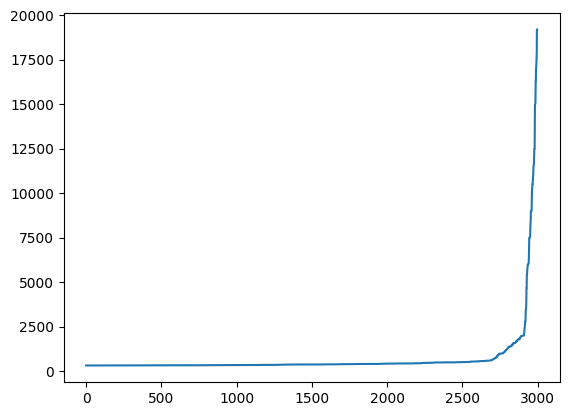

In [42]:
plt.plot(sorted_powerPS[-3000:-2])
plt.show()

As seen above, the power curve sharply increases after the power PS value of 1500. Further online research indicates that up to the year 2016, the highest power output in a car was 1521 PS, with the Koenigsegg Regera being the specific car achieving this power. You can verify this information here: [List of production cars by power output](https://en.m.wikipedia.org/wiki/List_of_production_cars_by_power_output).

And since we are not considering classic cars (age > 30), we have details for cars from the year 1986 to 2016. However, it's worth noting that in the year 1986, the minimum power output for cars was 26 hp, as evidenced by the presence of a car named Trabant 601 in our dataset.

Check out: [Trabant 601 on FastestLaps](https://fastestlaps.com/models/trabant-601)

In [43]:
df[(df.powerPS==26)].head()

,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,Age
43305,0,limousine,Manual,26,601,150000,petrol,trabant,yes,26
216092,900,limousine,Manual,26,601,150000,petrol,trabant,No,27
240109,1000,limousine,Manual,26,601,50000,other,trabant,No,27
240118,700,limousine,Manual,26,601,60000,other,trabant,No,27
240122,2500,limousine,Manual,26,601,90000,other,trabant,No,28


In [44]:
df[(df.powerPS==1500)]

,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,Age
18407,1600,limousine,Manual,1500,passat,150000,petrol,volkswagen,No,18
170794,4700,station wagon,automatic,1500,3er,150000,diesel,bmw,No,12
216668,1400,limousine,Manual,1500,5er,150000,diesel,bmw,No,18
217982,1500,limousine,Manual,1500,3er,150000,petrol,bmw,No,18


As observed above, Volkswagen and BMW cars are listed with a power PS value of 1500, which is incorrect. Up to the year 2016, the Volkswagen car with the highest power PS was the Volkswagen Phaeton W12 4motion with 450 PS, and the BMW car with the highest power PS was the F10 BMW M5 with 592 PS. Therefore, we should exclude rows with power PS values less than or equal to 1500.


In [45]:
df=df[(df.powerPS>=26) & (df.powerPS<1500)]

In [46]:
df["powerPS"].describe()

count    303432.000000
mean        125.787593
std          62.114035
min          26.000000
25%          80.000000
50%         116.000000
75%         150.000000
max        1436.000000
Name: powerPS, dtype: float64

## in kilometer column

In [47]:
sorted_kilometer = np.sort(df["kilometer"].dropna())

for i in range(0, 100, 10):
    percentile_value = np.percentile(sorted_kilometer, i)
    print(f"{i} percentile value is {percentile_value}")
percentile_100 = sorted_kilometer[-1]
print("100 percentile value is ", percentile_100)

0 percentile value is 5000.0
10 percentile value is 60000.0
20 percentile value is 90000.0
30 percentile value is 125000.0
40 percentile value is 150000.0
50 percentile value is 150000.0
60 percentile value is 150000.0
70 percentile value is 150000.0
80 percentile value is 150000.0
90 percentile value is 150000.0
100 percentile value is  150000


In the 'kilometer' column, all values appear to be within the normal range, so there is no need to remove any data.

## Univariate Analysis

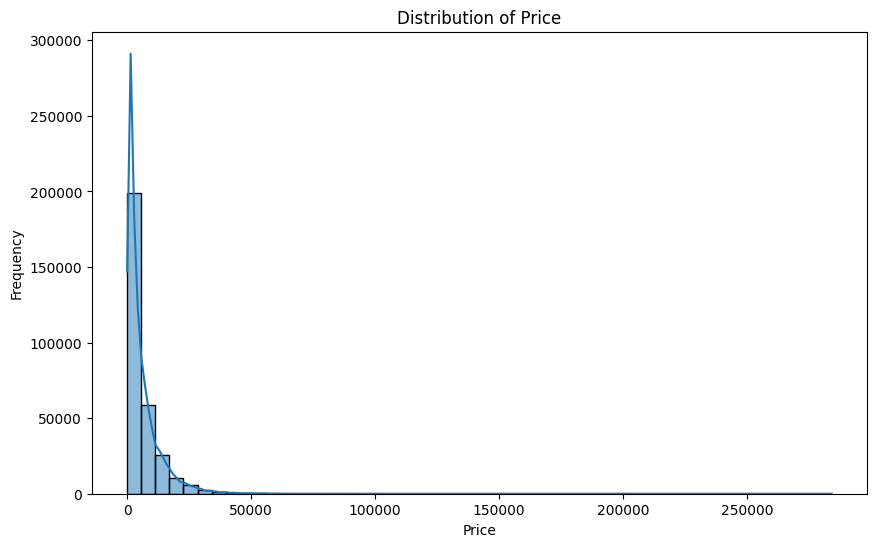

In [48]:
# Distribution of 'price' columm
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

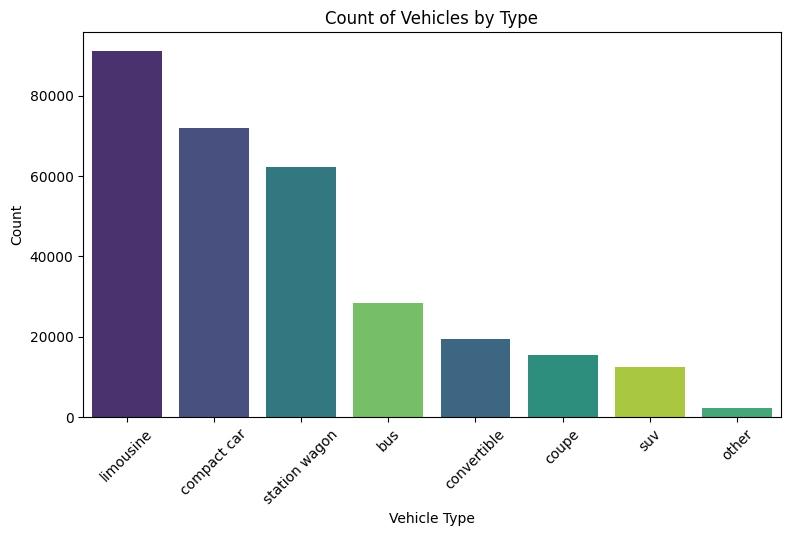

In [49]:
# Countplot for 'vehicleType' column
color_palette = sns.color_palette("viridis", len(df['vehicleType'].unique()))
plt.figure(figsize=(9, 5))
order = df['vehicleType'].value_counts().index
ax = sns.countplot(data=df, x='vehicleType', hue='vehicleType',order=order, palette=color_palette, legend=False)
plt.title('Count of Vehicles by Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

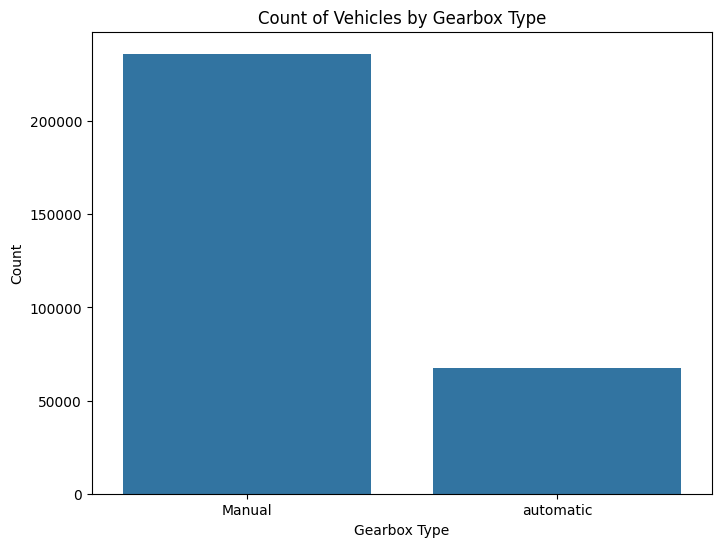

In [50]:
# Count of each category of gearbox type
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gearbox')
plt.title('Count of Vehicles by Gearbox Type')
plt.xlabel('Gearbox Type')
plt.ylabel('Count')
plt.show()

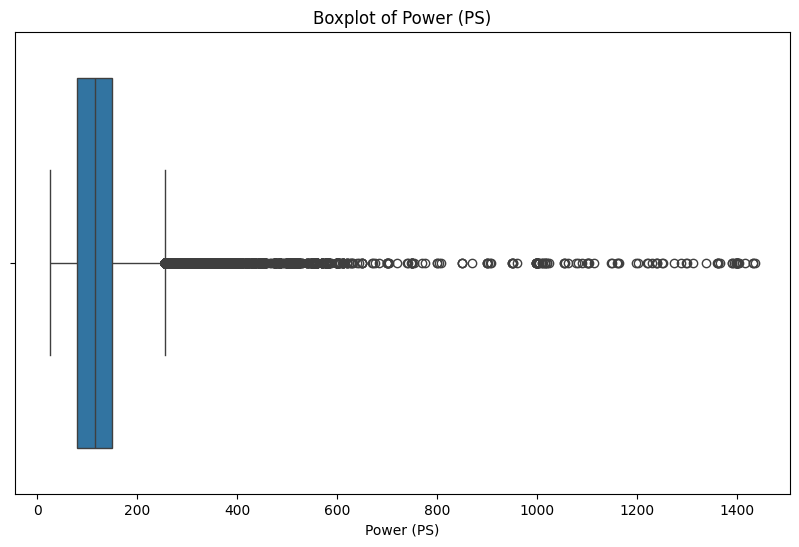

In [51]:
# Boxplot for 'powerPS' column
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='powerPS')
plt.title('Boxplot of Power (PS)')
plt.xlabel('Power (PS)')
plt.show()

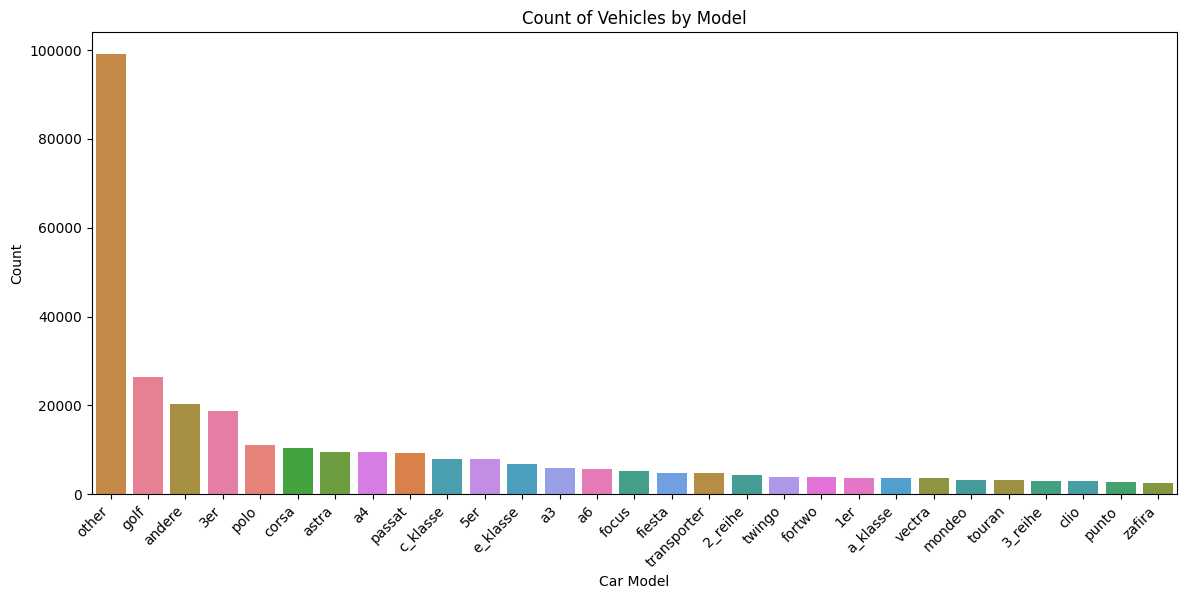

In [52]:
# Count of each category of car models

low_count_models = df['model'].value_counts()[df['model'].value_counts() < 2500].index

df_viz = df.copy()

df_viz['model'] = df['model'].replace(low_count_models, 'other')

custom_palette = sns.color_palette("husl", len(df_viz['model'].value_counts()))
plt.figure(figsize=(14, 6))
sns.countplot(data=df_viz, x='model', hue = "model", order=df_viz['model'].value_counts().index, palette=custom_palette,legend=False)
plt.title('Count of Vehicles by Model')
plt.xlabel('Car Model')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

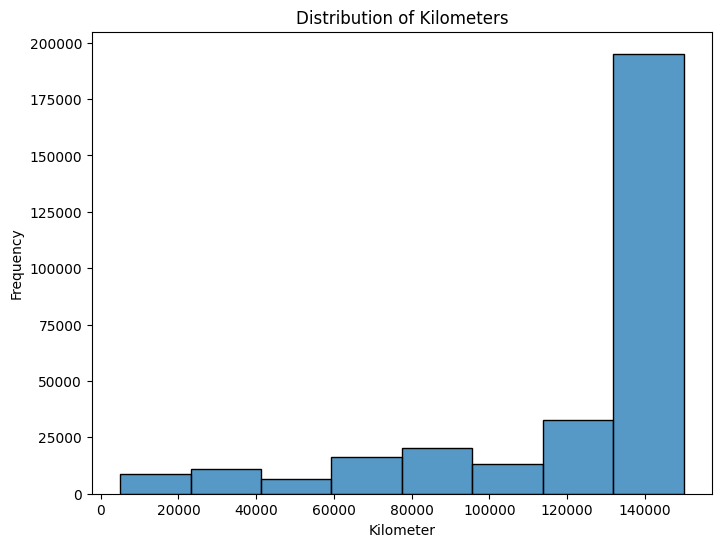

In [53]:
# Histogram of kilometer column
plt.figure(figsize=(8, 6))
sns.histplot(df['kilometer'], bins=8)
plt.title('Distribution of Kilometers')
plt.xlabel('Kilometer')
plt.ylabel('Frequency')
plt.show()

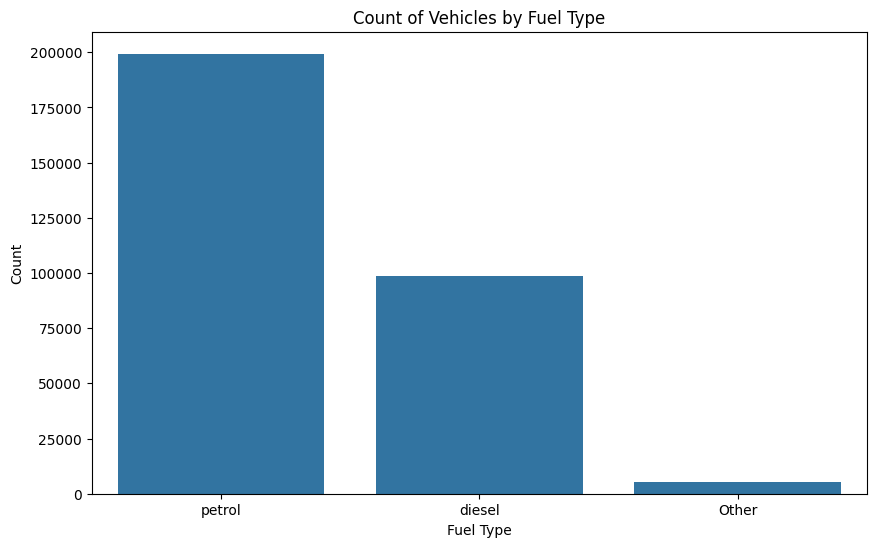

In [54]:
# Countplot for 'fuelType' column
low_count_categories = df['fuelType'].value_counts()[df['fuelType'].value_counts() < 5000].index
df_visualization = df.copy()
df_visualization['fuelType'] = df_visualization['fuelType'].replace(low_count_categories, 'Other')


plt.figure(figsize=(10, 6))
sns.countplot(data=df_visualization, x='fuelType', order=df_visualization['fuelType'].value_counts().index)
plt.title('Count of Vehicles by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

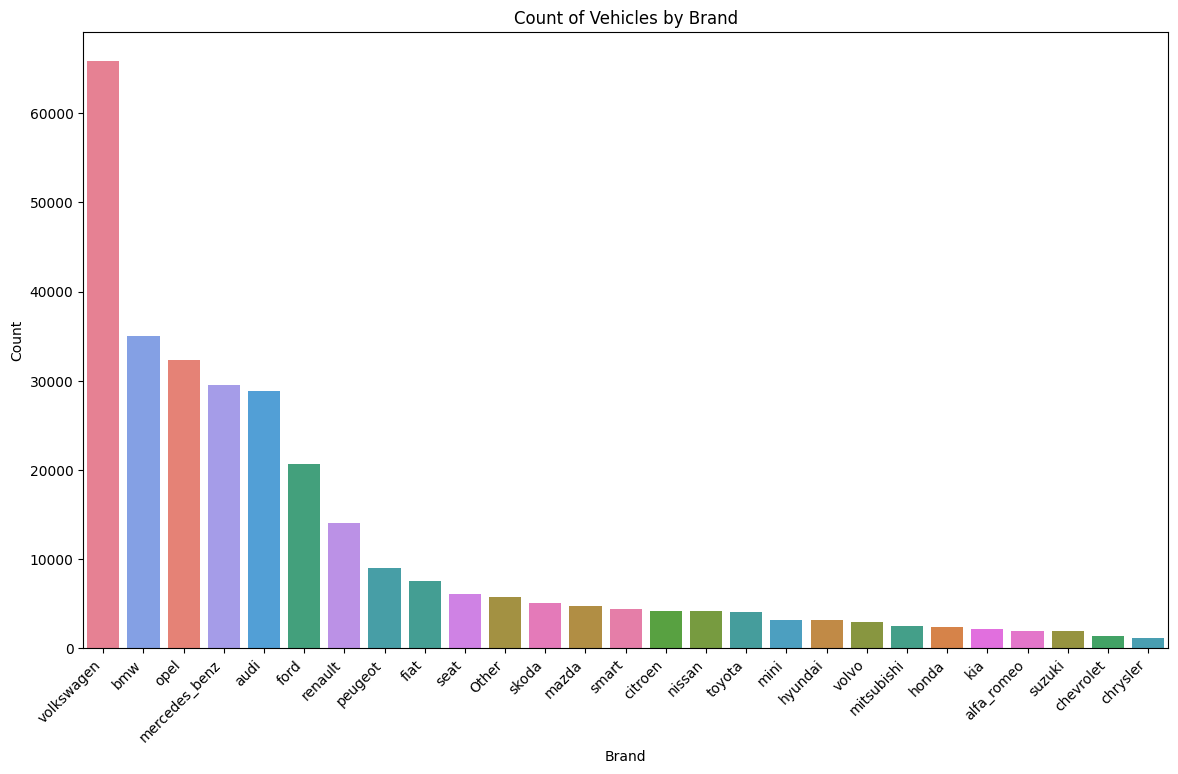

In [55]:
# Countplot for 'brand' column
low_count_brands = df['brand'].value_counts()[df['brand'].value_counts() < 1000].index

df_visualization = df.copy()

df_visualization['brand'] = df_visualization['brand'].replace(low_count_brands, 'Other')

custom_palette = sns.color_palette("husl", len(df_visualization['brand'].value_counts()))

plt.figure(figsize=(14, 8))
sns.countplot(data=df_visualization, x='brand', hue ='brand', order=df_visualization['brand'].value_counts().index, palette=custom_palette,legend=False )
plt.title('Count of Vehicles by Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

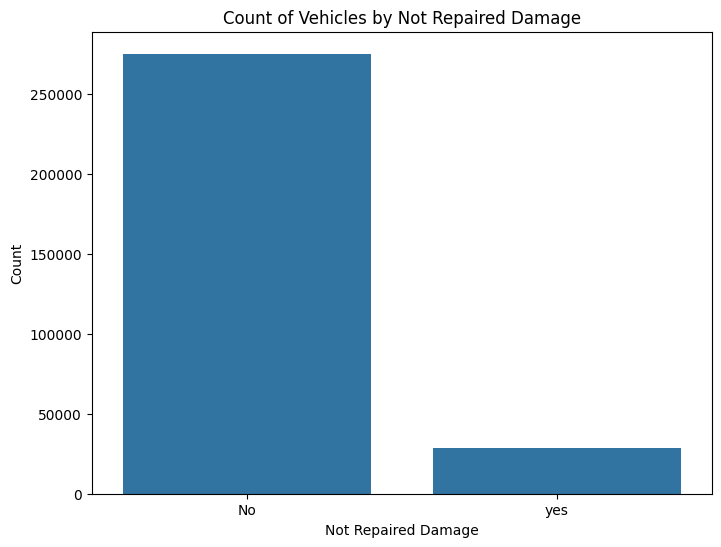

In [56]:
# Countplot for 'notRepairedDamage' column
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='notRepairedDamage')
plt.title('Count of Vehicles by Not Repaired Damage')
plt.xlabel('Not Repaired Damage')
plt.ylabel('Count')
plt.show()

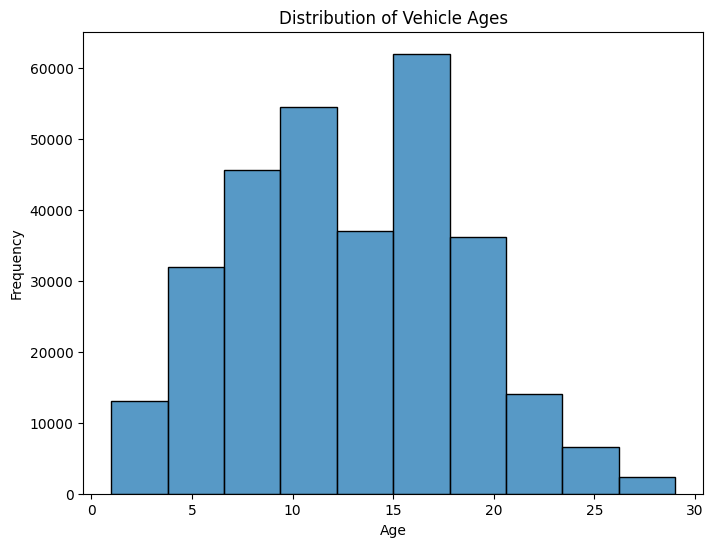

In [57]:
# histogram of age column
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=10)
plt.title('Distribution of Vehicle Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Bivariate Analysis

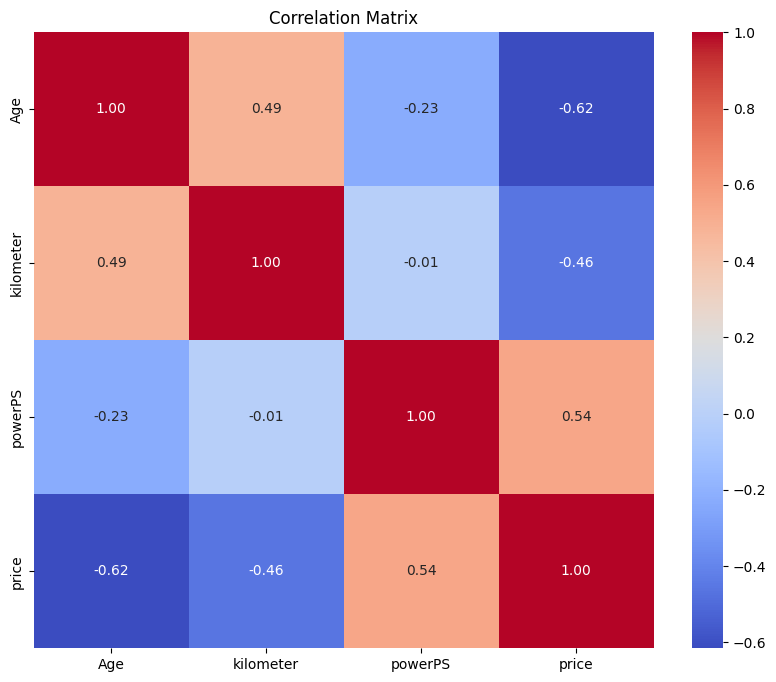

In [58]:
numeric_columns = ["Age","kilometer","powerPS","price"]

# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

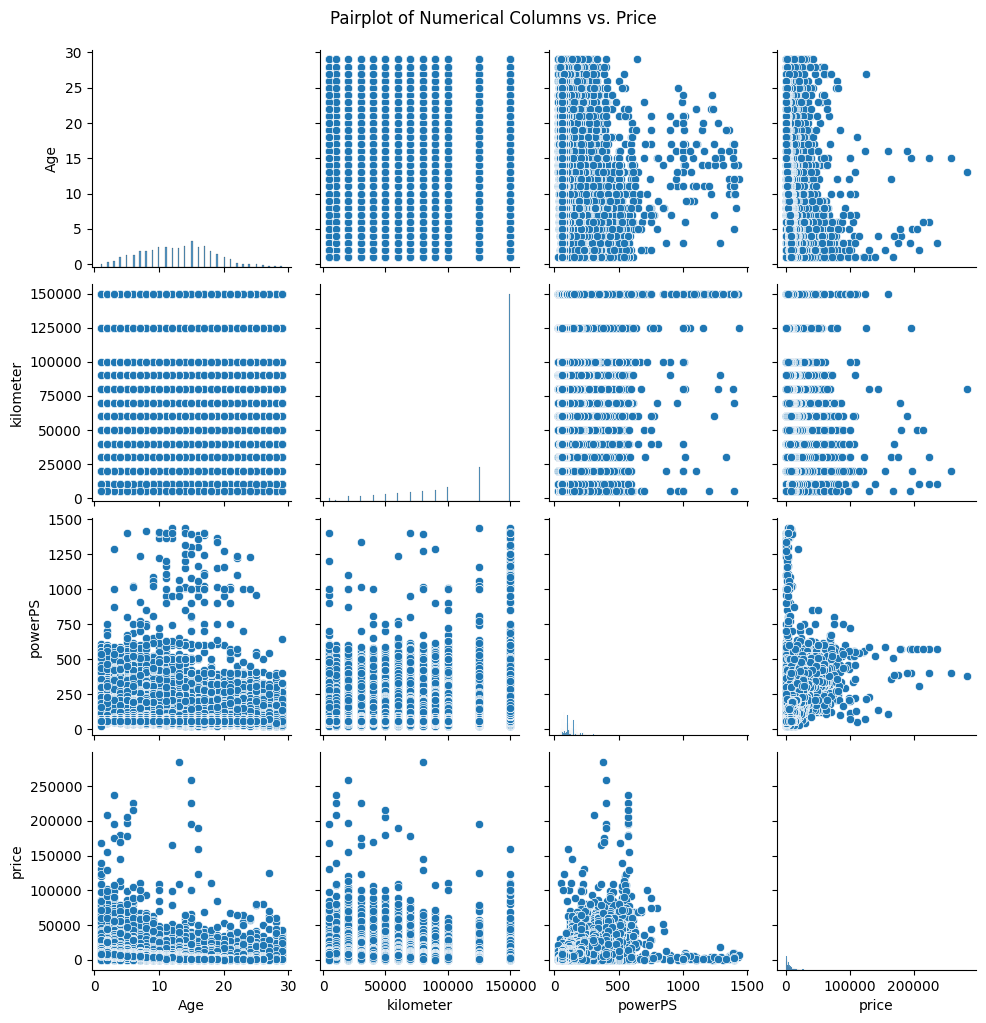

In [59]:
#pairplot

numeric_columns = ["Age", "kilometer", "powerPS", "price"]
df[numeric_columns] = df[numeric_columns].astype(float)

sns.pairplot(df[numeric_columns])
plt.suptitle('Pairplot of Numerical Columns vs. Price', y=1.02)
plt.show()

# Data Preprocessing

## feature engineering

### For 'brand': 
#### Top 10 Brands:
Keep only the top 10 brands based on their frequency and group the remaining ones into an 'other' category.

In [60]:
top_brands = df['brand'].value_counts().nlargest(10).index
df['brand_grouped'] = df['brand'].where(df['brand'].isin(top_brands), 'other_brandsbrand_grouped')

In [61]:
df = df.drop("brand",axis=1)

### For 'model':

Replacing models with their popularity scores based on the number of occurrences.

In [62]:
model_popularity = df['model'].value_counts(normalize=True).to_dict()
df['model_popularity'] = df['model'].map(model_popularity)

In [63]:
df = df.drop("model",axis=1)

### For Age 

Converting the 'Age' column into categorical bins to represent different age groups.

In [64]:
df['mileage_per_year'] = df['kilometer'] / df['Age']

In [65]:
df["Age"].describe()

count    303432.000000
mean         12.727764
std           5.534993
min           1.000000
25%           9.000000
50%          13.000000
75%          17.000000
max          29.000000
Name: Age, dtype: float64

In [66]:
bins = [0, 5, 10, 15, 20, 25, 30]
labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30']

df['Age'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [67]:
df["vehicleType"].unique()

array(['limousine', 'compact car', 'convertible', 'station wagon',
       'coupe', 'other', 'bus', 'suv'], dtype=object)

## Data Splitting:

In [68]:
target = ["price"]
numerical = ["powerPS","kilometer","model_popularity","mileage_per_year"]
categorical = ['vehicleType','gearbox', 'fuelType', 'brand_grouped','Age','notRepairedDamage']

In [69]:
mean_price = df['price'].mean()
mean_price

5888.747933639168

In [70]:
random_state_value = 42

initial_train_val, test_set = train_test_split(df, test_size=0.2, random_state=random_state_value)
train_set, validation_set = train_test_split(initial_train_val, test_size=0.25, random_state=random_state_value)

MinMaxScaler scales the selected columns to a specified range (default is 0 to 1).

In [71]:
scaler = MinMaxScaler()

train_set[numerical] = scaler.fit_transform(train_set[numerical])

validation_set[numerical] = scaler.transform(validation_set[numerical])

test_set[numerical] = scaler.transform(test_set[numerical])

## Encoding categorical variables:

In [72]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(df[categorical])
mod_cat_cols = []

for column in tqdm(categorical):
    encoder_n = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(df[[column]])
    mod_cat_cols_n = list(encoder_n.get_feature_names_out([column]))

    train_set[mod_cat_cols_n] = encoder_n.transform(train_set[[column]])
    test_set[mod_cat_cols_n] = encoder_n.transform(test_set[[column]])
    validation_set[mod_cat_cols_n] = encoder_n.transform(validation_set[[column]])

    mod_cat_cols += mod_cat_cols_n

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 14.58it/s]


In [73]:
#features
train_x = train_set[numerical + mod_cat_cols]
test_x = test_set[numerical + mod_cat_cols]
val_x = validation_set[numerical + mod_cat_cols]

#targets
train_y = train_set[target]
test_y = test_set[target]
val_y = validation_set[target]

## Model selection

In [74]:
def apply_regression_methods(X_train, y_train, X_test, y_test):
    # Initialize models
    linear_reg = LinearRegression()
    ridge_reg = Ridge()
    lasso_reg = Lasso(max_iter=10000)
    xgboost_reg = xgb.XGBRegressor()

    models = {'Linear Regression': linear_reg,
              'Ridge Regression': ridge_reg,
              'Lasso Regression': lasso_reg,
              'XGBoost Regression': xgboost_reg}

    results = {}

    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Evaluate the model
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        results[model_name] = {'Model': model,
                               'Mean Squared Error': mse,
                               'R^2 Score': r2}

    return results

In [75]:
regression_results_val_set = apply_regression_methods(train_x, train_y, val_x, val_y)
regression_results_test_set = apply_regression_methods(train_x, train_y, test_x, test_y)

## Error in validation set

In [76]:
for model_name, result in regression_results_val_set.items():
    print(f"{model_name} Results:")
    print(f"Mean Squared Error: {result['Mean Squared Error']}")
    print(f"R^2 Score: {result['R^2 Score']}")
    print("\n")

Linear Regression Results:
Mean Squared Error: 18229629.522067122
R^2 Score: 0.6642905490021771


Ridge Regression Results:
Mean Squared Error: 18231282.45474523
R^2 Score: 0.6642601092655257


Lasso Regression Results:
Mean Squared Error: 18244668.680097185
R^2 Score: 0.6640135939779606


XGBoost Regression Results:
Mean Squared Error: 9082105.07015065
R^2 Score: 0.8327476428791907




## Error in test set

In [77]:
for model_name, result in regression_results_test_set.items():
    print(f"{model_name} Results:")
    print(f"Mean Squared Error: {result['Mean Squared Error']}")
    print(f"R^2 Score: {result['R^2 Score']}")
    print("\n")

Linear Regression Results:
Mean Squared Error: 15352527.207423953
R^2 Score: 0.7040540542674749


Ridge Regression Results:
Mean Squared Error: 15354373.904215442
R^2 Score: 0.704018456061326


Lasso Regression Results:
Mean Squared Error: 15363334.793182902
R^2 Score: 0.7038457197603738


XGBoost Regression Results:
Mean Squared Error: 6919764.334278674
R^2 Score: 0.866609830910183




#### Given the robust performance of the XGBoost model, let's proceed with it.

In [78]:
model = xgb.XGBRegressor(random_state=42)
model.fit(train_x, train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

Verifying the model accuracy with the latest unseen data, which is available on eBay.

Check this data on eBay: [eBay Listing](https://www.ebay.co.uk/itm/256432251038?itmmeta=01HR69PQQ4ZA3TDB40KMCP7CJ4&hash=item3bb48da09e:g:yP4AAOSwN-dl44s1)

In [79]:
#'price','vehicleType', 'gearbox', 'powerPS', 'kilometer', 'fuelType','notRepairedDamage', 'Age', 'brand_grouped', 'model_popularity','mileage_per_year'
car_desc = [4500, "station wagon", "manual", 140, 177241, "diesel", "No", "6-10", "volkswagen", 0.034164, 17724.1]

pred_inst = pd.DataFrame(columns=df.columns)
pred_inst.loc[0] = car_desc

pred_inst[numerical] = scaler.fit_transform(pred_inst[numerical])
pred_inst[mod_cat_cols] = encoder.transform(pred_inst[categorical])
pred_x = pred_inst[numerical + mod_cat_cols]
pred_y = pred_inst[target]

prediction = model.predict(pred_x)
print(f"actual_price:")
pred_y

actual_price:


,price
0,4500


In [80]:
print(f"predicted_price: {prediction}")

predicted_price: [3983.7026]


In [81]:
# Converting to scalars
actual_price = pred_y.values[0][0] if isinstance(pred_y.values[0], np.ndarray) else pred_y.values[0]
predicted_price = prediction[0][0] if isinstance(prediction[0], np.ndarray) else prediction[0]


print(f"listing price={actual_price:.2f}  /  predicted price={predicted_price:.2f}")

listing price=4500.00  /  predicted price=3983.70


The prediction is very close to the price, with a prediction error of 11.47%

Applying cross-validation to the XGBoost model to obtain a more reliable estimate of its performance.

In [82]:
scaler = MinMaxScaler()
df1 = df.copy()
df1[numerical] = scaler.fit_transform(df1[numerical])

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(df1[categorical])
mod_cat_cols_df = []

for column in tqdm(categorical):
    encoder_n = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(df1[[column]])
    mod_cat_cols_n = list(encoder_n.get_feature_names_out([column]))
    df1[mod_cat_cols_n] = encoder_n.transform(df1[[column]])
    mod_cat_cols_df += mod_cat_cols_n

#features
X = df1[numerical + mod_cat_cols_df]

#targets
y = df1[target]
y = y.values.ravel()

model = xgb.XGBRegressor()  
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print(f"Cross-Validation R^2 Scores: {cv_scores}")
print(f"Mean R^2: {cv_scores.mean()}")

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 15.63it/s]


Cross-Validation R^2 Scores: [0.67945599 0.7913564  0.75962117 0.79036493 0.72022849]
Mean R^2: 0.748205395406347
